In [1]:
import paho.mqtt.client as mqtt

In [2]:
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("MQTT: connected with result code "+str(rc))
    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("tele/tasmota_B5F9F3/SENSOR")


In [4]:
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    global counter, fig, x ,y, ax
    topicTree = msg.topic.split('/')
    print("on_message: MQTT: %s [%d] payload: %s" % (msg.topic , len(topicTree),  msg.payload.decode()) )
    counter+=1
    print("counter %d " % counter)
    x = np.linspace(0, 2*np.pi, 300)
    y = np.abs(2*x)
#    plt.plot(x, y)
    plt.title("A little chirp")
#    fig.canvas.draw()
#    fig.canvas.flush_events()
    ax.clear()
    ax.plot(x, y)


In [5]:
#setup mqtt
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("192.168.179.2", 1883, 60)

0

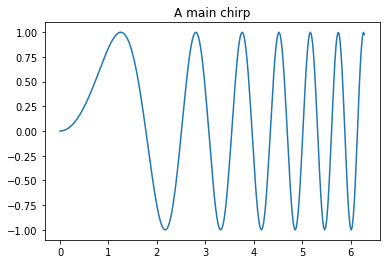

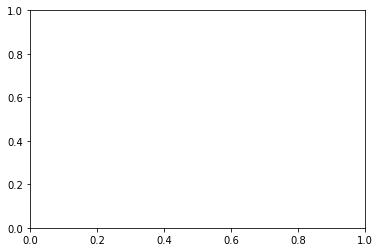

In [6]:
counter=0
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A main chirp")
plt.show()
#fig = plt.gcf()  # let's keep the figure object around for later...
fig=plt.figure()
ax = fig.add_subplot(1,1,1)


In [ ]:
client.loop_forever()

MQTT: connected with result code 0
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T17:01:59","VINDRIKTNING":{"PM2.5":25}}
counter 1 
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T17:02:59","VINDRIKTNING":{"PM2.5":21}}
counter 2 
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T17:03:59","VINDRIKTNING":{"PM2.5":22}}
counter 3 
on_message: MQTT: tele/tasmota_B5F9F3/SENSOR [3] payload: {"Time":"2021-12-28T17:04:59","VINDRIKTNING":{"PM2.5":22}}
counter 4 
